# Working with the output of houghlines

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import skeletonize
from skimage.transform import probabilistic_hough_line
from numpy.linalg import norm

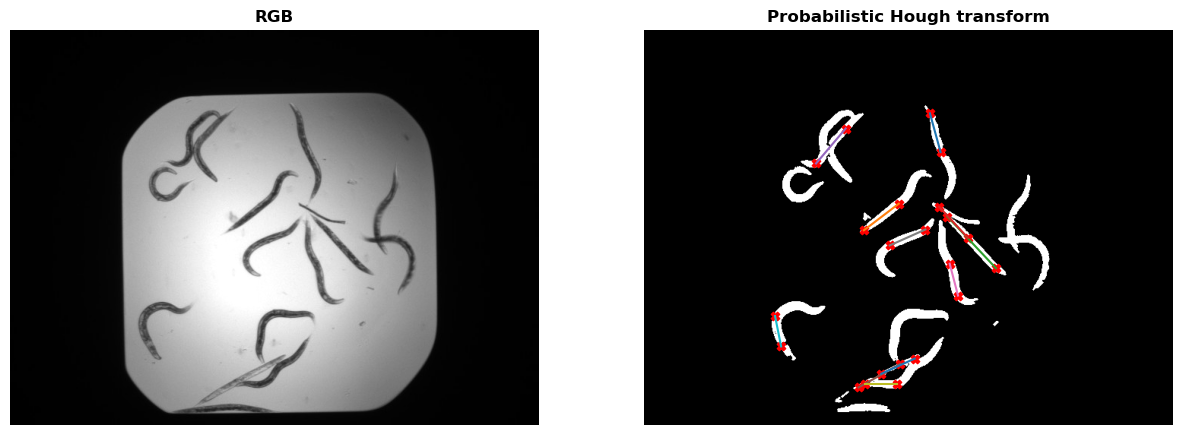

In [2]:
worms = cv2.imread("./images/wormsAlive.jpg", cv2.IMREAD_GRAYSCALE)
worms_binary = cv2.imread("./images/wormsAliveBW.jpg", cv2.IMREAD_GRAYSCALE)
_, worms_binary = cv2.threshold(worms_binary, 127, 255, cv2.THRESH_OTSU)
worms_skeletonize = skeletonize(worms_binary / 255)
worms_lines = probabilistic_hough_line(worms_skeletonize, threshold=10, line_length=40, line_gap=10, seed=0)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(worms, cmap='gray')
axs[0].axis('off')
axs[0].set_title('RGB')
axs[1].imshow(worms_binary, cmap='gray')
for line in worms_lines:
    p0, p1 = line
    axs[1].plot((p0[0], p1[0]), (p0[1], p1[1]))
    axs[1].scatter((p0[0], p1[0]), (p0[1], p1[1]), marker='X', color='red')
axs[1].axis('off')
axs[1].set_title('Probabilistic Hough transform')
plt.show()

We will calculate the median lengths of the worm lines found using the Hough transform. Then, we'll be able to detect which images contain live worms and which contain dead worms by comparing the median lengths to a cutoff value. To calculate the length of the detected lines, we need to extract the line's endpoints from the output of probabilistic_hough_line().

In [3]:
one_line = worms_lines[0]
one_line

((390, 160), (376, 109))

Each line's endpoints are stored in a tuple. We'll need these to compute the length. 

In [4]:
point_1 = one_line[0]
point_1

(390, 160)

In [5]:
point_2 = one_line[1]
point_2

(376, 109)

To compute the distance between two points, we can compute the norm of their difference.

In [6]:
worms_length = norm(np.array(point_2) - np.array(point_1))
worms_length

52.88667128870941

To compute the lengths of the other detected lines, we can use the code that we wrote in the previous three tasks in the body of a for loop. 

In [7]:
worms_lengths = []
for i in range(len(worms_lines)):
    one_line = worms_lines[0]
    point_1 = one_line[0]
    point_2 = one_line[1]
    worms_length = norm(np.array(point_2) - np.array(point_1))
    worms_lengths.append(worms_length)

The median length of the lines is a good descriptor of the state of the worms in the image. 

In [8]:
median_length = np.median(worms_lengths)
median_length

52.88667128870941